# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Deduplication Using K-means Clustering

**Steps**:
1. Data Set: Download a dataset containing duplicate customer records.
2. Preprocess: Standardize the data to ensure better clustering.
3. Apply K-means: Use K-means clustering to find and group similar customer records.
4. Identify Duplicates: Identify and remove duplicates within clusters.

Original Dataset:
             Name               Email       Phone
0       John Doe    john@example.com  1234567890
1        Jon Doe     jon@example.com  1234567890
2     Jane Smith    jane@example.com  2345678901
3     Jane Smyth  jane.s@example.com  2345678901
4  Alice Johnson  alicej@example.com  3456789012
5  Alyce Johnson  alycej@example.com  3456789012
6      Bob Stone     bob@example.com  4567890123
7   Robert Stone     rob@example.com  4567890123
8      Bob Stone     bob@example.com  4567890123

Deduplicated Records (1 per cluster):
             Name               Email       Phone  Cluster
0     Jane Smyth  jane.s@example.com  2345678901        0
1      Bob Stone     bob@example.com  4567890123        1
2       John Doe    john@example.com  1234567890        2
3  Alice Johnson  alicej@example.com  3456789012        3


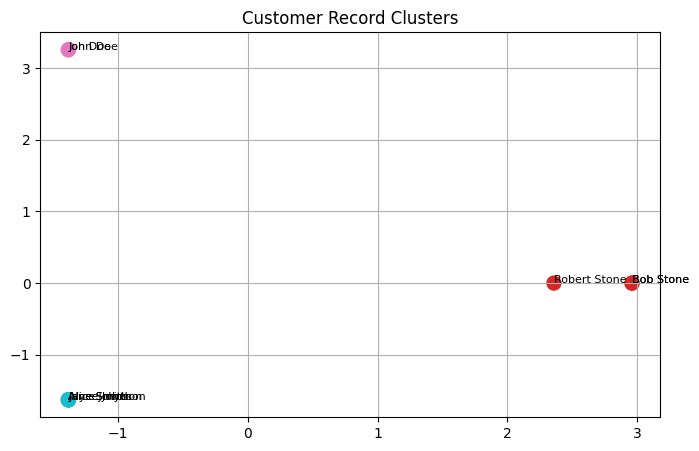

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# Step 1: Simulate a dataset with duplicate customer records
data = {
    'Name': ['John Doe', 'Jon Doe', 'Jane Smith', 'Jane Smyth', 'Alice Johnson',
             'Alyce Johnson', 'Bob Stone', 'Robert Stone', 'Bob Stone'],  # duplicates
    'Email': ['john@example.com', 'jon@example.com', 'jane@example.com', 'jane.s@example.com',
              'alicej@example.com', 'alycej@example.com', 'bob@example.com', 'rob@example.com', 'bob@example.com'],
    'Phone': ['1234567890', '1234567890', '2345678901', '2345678901',
              '3456789012', '3456789012', '4567890123', '4567890123', '4567890123']
}

df = pd.DataFrame(data)

print("Original Dataset:\n", df)

# Step 2: Preprocess data (convert categorical to numeric using TF-IDF or hashing)
# For simplicity, we'll use one-hot encoding here
df_encoded = pd.get_dummies(df, columns=['Name', 'Email', 'Phone'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Step 3: Apply K-means clustering
k = 4  # Number of expected unique customers (adjust based on known dedup count)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# Step 4: Identify duplicates
# We assume records in the same cluster and close to each other are potential duplicates
# Find one representative per cluster
representative_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_scaled)
deduplicated_df = df.loc[representative_indices].reset_index(drop=True)

print("\nDeduplicated Records (1 per cluster):\n", deduplicated_df)

# Optional: Visualize Clusters (using PCA for 2D representation)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=100)
for i, txt in enumerate(df['Name']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.title("Customer Record Clusters")
plt.grid(True)
plt.show()